 # <font color='blue'> ASEM 2020</font> 

 ## <font color = 'green' > Importing Libraries: <font>

In [13]:
import pandas as pd;
import numpy as np;
import os;
import matplotlib.pyplot as plt;
import seaborn as sns;

 ## <font color = 'green' > Importing Data: <font>

In [14]:
file_encoding = 'cp1252'  
order =pd.read_csv("C:/Users/venka/OneDrive/Desktop/asem/instacart-market-basket-analysis/orders.csv", encoding=file_encoding)
#data = pd.read_csv("./sales_data_sample.csv")

In [15]:
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [16]:
prior = pd.read_csv('C:/Users/venka/OneDrive/Desktop/asem/instacart-market-basket-analysis/order_products__prior.csv')
prior.head() # Here the reordered column tells the prior order count 

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [12]:
prior 
prior.shape

(32434489, 4)

In [6]:
order_prior = pd.merge(prior, order, on = ['order_id','order_id'])
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
221645,23391,13198,1,1,7,prior,17,0,10,28.0
221646,23391,42803,2,1,7,prior,17,0,10,28.0
221647,23391,8277,3,1,7,prior,17,0,10,28.0
221648,23391,37602,4,1,7,prior,17,0,10,28.0
221649,23391,40852,5,1,7,prior,17,0,10,28.0


In [7]:
order_prior['eval_set'].value_counts()

prior    300000
Name: eval_set, dtype: int64

In [8]:
train = pd.read_csv('C:/Users/venka/OneDrive/Desktop/asem/instacart-market-basket-analysis/order_products__train.csv')
train.head()

# For each user we may have n-1 prior orders and 1 train order OR n-1 prior orders and 1 test order in which we have to state what products have been reordered.

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
train.shape

(1384617, 4)

In [10]:
products = pd.read_csv('C:/Users/venka/OneDrive/Desktop/asem/instacart-market-basket-analysis/products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
aisles = pd.read_csv('C:/Users/venka/OneDrive/Desktop/asem/instacart-market-basket-analysis/aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
print(aisles.shape)

(134, 2)


## <font color = 'green' > Merging Data: <font>

In [85]:
temp = pd.merge(train,products, on = ['product_id','product_id'])
temp = pd.merge(temp,order,on=['order_id','order_id'])
data = pd.merge(temp,aisles,on=['aisle_id','aisle_id'])
data.head(1)  # Here order_dow represents the days of the week

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt


In [14]:
data.eval_set.unique()

array(['train'], dtype=object)

In [15]:
#data['reordered'].value_counts()
data.reordered.value_counts()

1    828824
0    555793
Name: reordered, dtype: int64

## <font color = 'green' > Determining Data: <font>

In [16]:
data.head() # This is the Final data set for further analysis

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt
1,816049,49302,7,1,Bulgarian Yogurt,120,16,47901,train,14,4,6,16.0,yogurt
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,2993,train,15,0,7,7.0,yogurt
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,41425,train,4,3,8,14.0,yogurt
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,187205,train,5,4,14,30.0,yogurt


In [17]:
data.shape  # 32434489 Rows and 14 Columns are there in the data set.

(1384617, 14)

In [84]:
#data["user_id"].unique()
data.groupby(["user_id"]).count().head()   #df.groupby(['domain', 'ID']).count()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
user_id,,,,,,,,,,,,,
1,11,11,11,11,11,11,11,11,11,11,11,11,11
2,31,31,31,31,31,31,31,31,31,31,31,31,31
5,9,9,9,9,9,9,9,9,9,9,9,9,9
7,9,9,9,9,9,9,9,9,9,9,9,9,9
8,18,18,18,18,18,18,18,18,18,18,18,18,18


In [19]:
data.eval_set.unique()

array(['train'], dtype=object)

In [20]:
data.isnull().any()

order_id                  False
product_id                False
add_to_cart_order         False
reordered                 False
product_name              False
aisle_id                  False
department_id             False
user_id                   False
eval_set                  False
order_number              False
order_dow                 False
order_hour_of_day         False
days_since_prior_order    False
aisle                     False
dtype: bool

In [21]:
data.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01,7.130423e+01,9.839777e+00,1.031128e+05,1.709141e+01,2.701392e+00,1.357759e+01,1.706613e+01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01,3.810409e+01,6.292830e+00,5.948715e+04,1.661404e+01,2.167646e+00,4.238458e+00,1.042642e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.173200e+04,6.000000e+00,1.000000e+00,1.000000e+01,7.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00,8.300000e+01,8.000000e+00,1.029330e+05,1.100000e+01,3.000000e+00,1.400000e+01,1.500000e+01
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.549590e+05,2.100000e+01,5.000000e+00,1.700000e+01,3.000000e+01
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [22]:
data.isnull().sum() # There are many Null values in days_since_prior_order which says those customers are new to the shop

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
aisle                     0
dtype: int64

In [23]:
data['aisle'].value_counts()[0:10] # asile is the product category and below are the counts od products within each category

# Fresh Fruits and Fresh Vegetables are high selling 

fresh vegetables                 150609
fresh fruits                     150473
packaged vegetables fruits        78493
yogurt                            55240
packaged cheese                   41699
water seltzer sparkling water     36617
milk                              32644
chips pretzels                    31269
soy lactosefree                   26240
bread                             23635
Name: aisle, dtype: int64

In [24]:
print("Top 10 Users:",data['user_id'].value_counts()[0:10]) # Top 10 Users

Top 10 Users: 149753    80
197541    80
63458     77
83993     76
189951    76
169647    75
31611     74
104741    74
181991    72
59321     72
Name: user_id, dtype: int64


In [25]:
len(data['product_name'].unique())

39123

In [26]:
data['product_name'].value_counts()[0:10]

Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Name: product_name, dtype: int64

In [27]:
print("Total Number of Products:",len(data['product_name'].unique()))
data['product_name'].unique()

Total Number of Products: 39123


array(['Bulgarian Yogurt', 'Whole Milk Plain Yogurt',
       'Organic Plain Cream Top Yogurt', ..., 'Blended Canadian Whisky',
       '10 Yr Single Malt Scotch Islay', 'Red Label Scotch'], dtype=object)

In [28]:
print("Number of Product Categories: ", len(data['aisle'].unique()))

Number of Product Categories:  134


## <font color = 'green' > Exploratory Data Analysis: <font>

In [29]:
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt
1,816049,49302,7,1,Bulgarian Yogurt,120,16,47901,train,14,4,6,16.0,yogurt
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,2993,train,15,0,7,7.0,yogurt
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,41425,train,4,3,8,14.0,yogurt
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,187205,train,5,4,14,30.0,yogurt


In [30]:
df = data.groupby("user_id").sum()
df.head() # Number 

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,,,,,
1,13066889,302926,66,10,792,166,121,44,88,154.0
2,46271375,762357,496,12,1470,266,465,31,341,930.0
5,19771173,223487,45,4,636,74,45,0,99,54.0
7,4726728,287939,45,8,404,80,189,18,99,54.0
8,15846750,463707,171,4,1358,119,72,18,252,180.0


In [31]:
#data.set_index('aisle')
aisle = data.groupby("aisle").sum().sort_values(by =["user_id"], ascending = False)
#filter = aisle.index == "air fresheners candles"
#aisle[filter]
df1 = aisle.head(10)
df1.head()


,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
aisle,,,,,,,,,,,
fresh fruits,256890679164,4119439266,1116960,110782,3611352,601892,15513504162,2787084,396771,2039240,2440804.0
fresh vegetables,255889372465,4007541101,1408908,91368,12500547,602436,15512992142,2581895,390772,2047235,2562668.0
packaged vegetables fruits,133870607995,2167743474,692276,51523,9654639,313972,8084117243,1389861,204070,1065412,1309088.0
yogurt,94683607868,1468727336,453988,37939,6628800,883840,5706077018,998514,144648,750395,926868.0
packaged cheese,71250923123,1003832255,402222,24897,875679,667184,4294821953,701607,112575,567538,722644.0


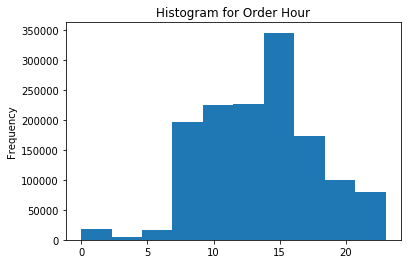

In [32]:
plot = data["order_hour_of_day"].plot.hist(x = 'order_hour_of_day')
plt.title("Histogram for Order Hour")
plt.show()

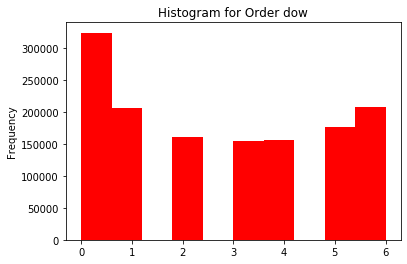

In [33]:
plot = data["order_dow"].plot.hist(x = 'order_dow', color = 'red')
plt.title("Histogram for Order dow")
plt.show()

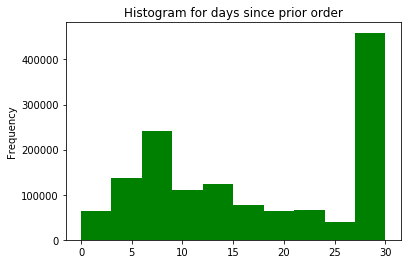

In [34]:
plot = data["days_since_prior_order"].plot.hist(x = 'days_since_prior_order', color = 'green')
plt.title("Histogram for days since prior order")
plt.show()

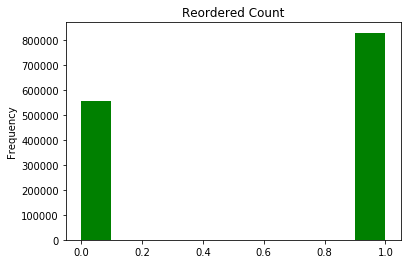

In [35]:
plot = data["reordered"].plot.hist(x = 'reordered', color = 'green')
plt.title("Reordered Count")
plt.show()

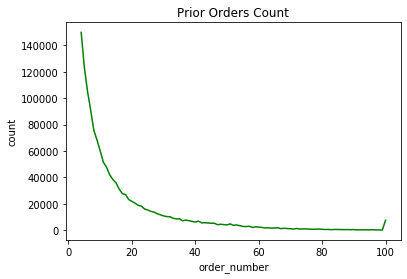

In [36]:
#data.sort_values(by = ["order_number"])
df2 = data.groupby('order_number').count()
plt.plot(df2.index, df2.order_id, color = 'green')
plt.xlabel("order_number")
plt.ylabel("count")
plt.title("Prior Orders Count")
plt.show()

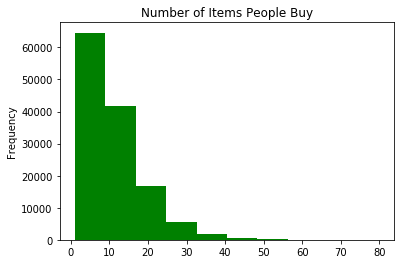

In [37]:
df3 = data.groupby(['order_id'])['add_to_cart_order'].transform(max) == data.add_to_cart_order
df4 = data[df3]
#plt.plot(df3.index, df3.product_id)
#plt.show()
plot = df4["add_to_cart_order"].plot.hist(x = 'add_to_cart_order', color = 'green')
plt.title("Number of Items People Buy")
plt.show()


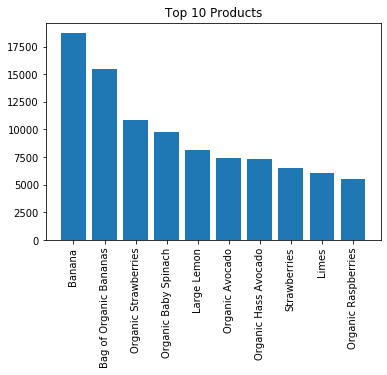

In [38]:
df5 = data.groupby(['product_name']).count()
df6 = df5.sort_values(by = 'order_id', ascending = False)
df7 = df6.head(10)
df7
plt.bar(df7.index, df7.order_id, orientation = 'vertical')
plt.xticks(rotation = 90)
plt.title("Top 10 Products")
plt.show()

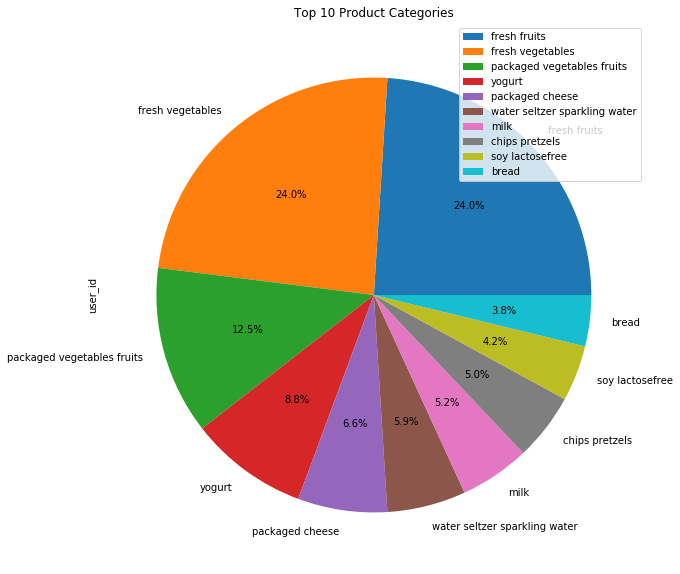

In [39]:
labels = df1.index

plot = df1.plot.pie(y='user_id', labels = labels,autopct='%.1f%%', figsize=(10,10))
plot.set_title("Top 10 Product Categories")

plt.show()

## <font color = 'green' > Heat Map for Correlation Matrix: <font>

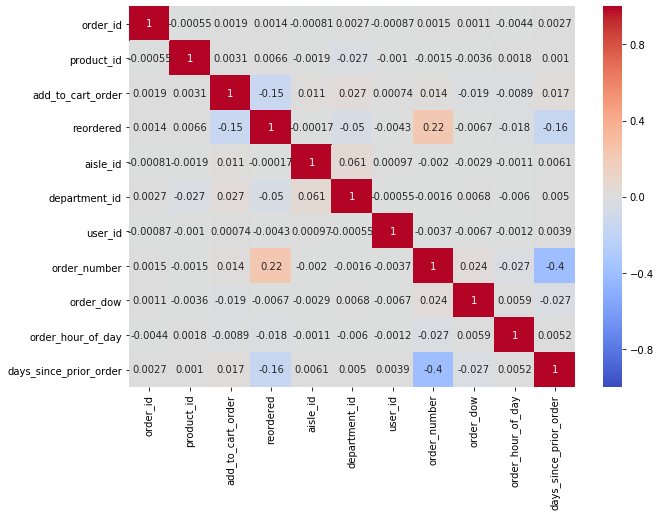

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

### I can find four coorelations from the above chart:
    
    1. Strong Positive Correlation between reordered and order_number. 
    2. Strong Negative Correlation between order_number and days_since_prior_order. This spots the customers who are getting 
       away from that particular retailer.
    3. The above relation is again strongly showed by the 2 - negative correlations between (reordered and                            days_since_prior_order) and (reordered and add_to_cart_order). 

## <font color = 'green' > Machine Learning Models: <font>

In [41]:
print(data.shape)
data.head()

(1384617, 14)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt
1,816049,49302,7,1,Bulgarian Yogurt,120,16,47901,train,14,4,6,16.0,yogurt
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,2993,train,15,0,7,7.0,yogurt
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,41425,train,4,3,8,14.0,yogurt
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,187205,train,5,4,14,30.0,yogurt


In [42]:
cust_prod = pd.crosstab(data['user_id'], data['aisle'])  # We are converting the crosstable format to change the categorical variables to numerical
print(cust_prod.shape)
cust_prod.head(10)


(131209, 134)


aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,9
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
cust_prod.shape # This is the crosstable used for PCA

(131209, 134)

## <font color = 'green' > PCA: <font>

[2.39854372e-01 9.02725283e-02 5.06073651e-02 3.80637914e-02
 3.02225545e-02 2.77154860e-02 2.51595588e-02 2.10647053e-02
 1.99279093e-02 1.72375962e-02 1.67064754e-02 1.57286996e-02
 1.51254873e-02 1.37171272e-02 1.23334825e-02 1.17220460e-02
 1.10231989e-02 1.04046745e-02 1.02856873e-02 9.98046188e-03
 9.66943365e-03 9.30737711e-03 8.66753838e-03 8.49311340e-03
 8.18265777e-03 8.05713788e-03 7.89522888e-03 7.41858822e-03
 7.28854565e-03 7.19312096e-03 6.98607022e-03 6.73431122e-03
 6.67831263e-03 6.31294815e-03 6.14037072e-03 6.10271834e-03
 6.00789880e-03 5.87941107e-03 5.77998775e-03 5.65343787e-03
 5.52310972e-03 5.23560944e-03 5.18498107e-03 5.05716598e-03
 4.86688070e-03 4.71462647e-03 4.61007659e-03 4.54771613e-03
 4.44718246e-03 4.40660277e-03 4.36108742e-03 4.18918079e-03
 4.04092886e-03 3.93933882e-03 3.71099670e-03 3.63909304e-03
 3.61040633e-03 3.50328079e-03 3.38651523e-03 3.12980034e-03
 2.92191637e-03 2.77888307e-03 2.65643759e-03 2.64752788e-03
 2.59026972e-03 2.474642

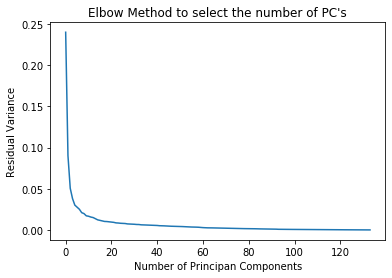

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)
explained_variance = pca.explained_variance_ratio_
print(explained_variance) # 6 PC's for 50% of Variance, 11 PC's for 60 % of Variance, 20 PC's for 70% of Variance 
new1 = pd.DataFrame(explained_variance)
#print(new1.head())
plt.plot(new1.index, new1[0])
plt.xlabel("Number of Principan Components")
plt.ylabel("Residual Variance")
plt.title("Elbow Method to select the number of PC's")
plt.show()

### The above Chart shows the number of PC's and their residual variance, we can infer 6 PC's are enough for analysis

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)
pd.DataFrame(pca_samples).head()

,0,1,2,3,4,5
0,-1.585968,-0.068665,1.013513,-0.235317,0.354781,-0.094315
1,1.941122,5.166711,-1.604438,-0.862762,2.859802,-0.725524
2,0.074848,-0.008703,-0.265352,1.375285,-0.591005,0.088340
3,-1.172812,0.391134,-0.402281,-0.261546,0.207610,-0.194382
4,6.420225,-4.774948,-0.290911,-0.606708,-0.417250,-0.000951


## <font color = 'green' > K Mean Clustering: <font>

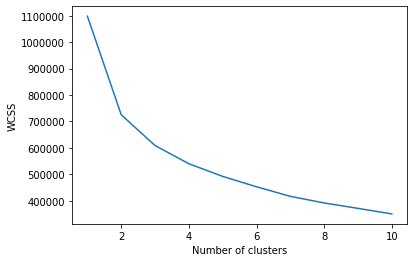

In [46]:
from sklearn.cluster import KMeans 
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_samples);
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
#plt.title('The Elbow Method to select number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [47]:
wcss

[1098271.3330443243,
 725221.1388387164,
 608790.8890170152,
 539870.2692611399,
 491957.00021266134,
 452609.2019465243,
 416469.6349027392,
 391395.0995895155,
 370941.1590981462,
 349896.53284895833]

### The above chart shows the relation between the number of clusters and their squared errors. We can infer 4 clusters are enough for a good analysis

In [48]:

# Applying k-means to dataSet with 5 clusters

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(pca_samples)
y_kmeans

array([0, 2, 0, ..., 0, 2, 0])

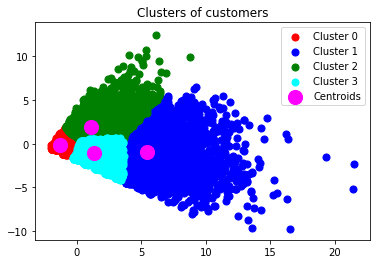

In [49]:
# Visualizing the clusters
plt.scatter(pca_samples[y_kmeans == 0, 0], pca_samples[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 0')
plt.scatter(pca_samples[y_kmeans == 1, 0], pca_samples[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(pca_samples[y_kmeans == 2, 0], pca_samples[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(pca_samples[y_kmeans == 3, 0], pca_samples[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 3')
#plt.scatter(pca_samples[y_kmeans == 4, 0], pca_samples[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
#plt.scatter(pca_samples[y_kmeans == 5, 0], pca_samples[y_kmeans == 5, 1], s = 50, c = 'yellow', label = 'Target')
#plt.scatter(pca_samples[y_kmeans == 6, 0], pca_samples[y_kmeans == 6, 1], s = 50, c = 'black', label = 'Careless')
#plt.scatter(pca_samples[y_kmeans == 7, 0], pca_samples[y_kmeans == 7, 1], s = 50, c = 'orange', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'magenta', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [50]:
np.unique(y_kmeans)

array([0, 1, 2, 3])

In [51]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = y_kmeans

clust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,9,2
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
count = (clust_prod.groupby(clust_prod.cluster).count())
print("Number of Users within each Cluster", count.tea)


Number of Users within each Cluster cluster
0    78859
1     8420
2    22370
3    21560
Name: tea, dtype: int64


In [53]:
c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
print((c0.sort_values(ascending = False)).head(10))


aisle
fresh fruits                     0.423541
packaged vegetables fruits       0.273095
water seltzer sparkling water    0.271966
yogurt                           0.240670
packaged cheese                  0.206812
chips pretzels                   0.200446
fresh vegetables                 0.195349
milk                             0.190758
ice cream ice                    0.157851
refrigerated                     0.145031
dtype: float64


In [54]:
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
print((c1.sort_values(ascending = False)).head(10))

aisle
fresh vegetables              6.100000
fresh fruits                  3.252375
packaged vegetables fruits    1.632898
yogurt                        0.757957
packaged cheese               0.614489
fresh herbs                   0.558789
frozen produce                0.395368
soy lactosefree               0.388480
milk                          0.369002
chips pretzels                0.310808
dtype: float64


In [55]:
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
print((c2.sort_values(ascending = False)).head(10))

aisle
fresh fruits                     3.071703
packaged vegetables fruits       1.198838
fresh vegetables                 0.992043
yogurt                           0.983281
packaged cheese                  0.522530
milk                             0.413321
chips pretzels                   0.371301
water seltzer sparkling water    0.341529
soy lactosefree                  0.308046
bread                            0.293250
dtype: float64


In [56]:
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
print((c3.sort_values(ascending = False)).head(10))


aisle
fresh vegetables                 2.859462
fresh fruits                     0.972820
packaged vegetables fruits       0.760204
packaged cheese                  0.395501
yogurt                           0.365631
fresh herbs                      0.253293
milk                             0.243414
soy lactosefree                  0.234184
water seltzer sparkling water    0.231725
frozen produce                   0.219434
dtype: float64


### The above four clusters will be now considered as a separate user groups and each have the above mean value for each of the aisles 

## <font color = 'green' >  Forecasting the Lead Time for each aisles: <font>

#### Now, we know what cluster, each customer belongs to and the average sale per aisle in each of the individual clusters are determined. Now, we have to forecast the lead time for each of the individual aisles by comparing the days_since_prior_order column . Finally, we can say what cluster each customer belongs to, and the average demand for each of the aisels and their lead time. 

In [57]:
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt
1,816049,49302,7,1,Bulgarian Yogurt,120,16,47901,train,14,4,6,16.0,yogurt
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,2993,train,15,0,7,7.0,yogurt
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,41425,train,4,3,8,14.0,yogurt
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,187205,train,5,4,14,30.0,yogurt


In [58]:
clust_prod.head() # This includes the column "cluster" that tell which cluster the customer belongs to

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [59]:
type(clust_prod)

pandas.core.frame.DataFrame

In [60]:
cluster = clust_prod.reset_index()

In [61]:
cluster.head()

aisle,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,5,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [62]:
user_cluster = cluster[["user_id","cluster"]]

In [63]:
clustered_data = pd.merge(data,user_cluster, on = ("user_id"))

In [64]:
clustered_data.head() # This is the final data set that gives the label cluster to determine the cluster which belongs to every customer. 
# This could be helpful for further classification of any new customers by Clustering techniques of supervised machine learning

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,cluster
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt,3
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0,other creams cheeses,3
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0,fresh vegetables,3
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0,fresh vegetables,3
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0,canned meat seafood,3


## Function to give the count, mean and lead time of any aisle from any cluster:

In [65]:
filter0 = clustered_data["cluster"] == 0 
filter1 = clustered_data["cluster"] == 1
filter2 = clustered_data["cluster"] == 2 
filter3 = clustered_data["cluster"] == 3 
clustered_data0 = clustered_data[filter0]
clustered_data1 = clustered_data[filter1]
clustered_data2 = clustered_data[filter2]
clustered_data3 = clustered_data[filter3]
lead_time0 = clustered_data0.groupby(["aisle"])["days_since_prior_order"].mean()
lead_time1 = clustered_data1.groupby(["aisle"])["days_since_prior_order"].mean()
lead_time2 = clustered_data2.groupby(["aisle"])["days_since_prior_order"].mean()
lead_time3 = clustered_data3.groupby(["aisle"])["days_since_prior_order"].mean()

In [66]:
c0["asian foods"]

0.03442853700909218

In [67]:
#print(len(c3))
c3["fresh vegetables"]
count0 = clust_prod["cluster"] == 0 
count0 = clust_prod[count0]
count1 = clust_prod["cluster"] == 1
count1 = clust_prod[count1]
count2 = clust_prod["cluster"] == 2
count2 = clust_prod[count2]
count3 = clust_prod["cluster"] == 3
count3 = clust_prod[count3]
len(count0)+len(count1)+len(count2)+len(count3) == len(clust_prod)



True

In [68]:
def meancounttime(aisle, cluster): 
        
    print("This is for Cluster:", cluster)
    if cluster == 0:
        print("Mean of", aisle, "is:", c0[aisle])
        print("Count of customers are:", len(count0))
        print("Lead time for", aisle, lead_time0[aisle])
        print("Therefore, the demand of a customer for",aisle, "is:", round(c0[aisle],2), "for every",round(lead_time0[aisle],0),"days")
    elif cluster == 1:
        print("Mean of", aisle, "is:", c1[aisle])
        print("Count of customers are:", len(count1))
        print("Lead time for", aisle, lead_time1[aisle])
        print("Therefore, the demand of a customer for", aisle, "is:", round(c1[aisle],2), "for every", round(lead_time1[aisle],0),"days")
    elif cluster == 2:
        print("Mean of", aisle, "is:", c2[aisle])
        print("Count of customers are:", len(count2))
        print("Lead time for", aisle, lead_time2[aisle])
        print("Therefore, the demand of a customer for", aisle, "is:", round(c2[aisle],2), "for every", round(lead_time2[aisle],0),"days")
    elif cluster == 3:
        print("Mean of", aisle, "is:", c3[aisle])
        print("Count of customers are", len(count3))
        print("Lead time for", aisle, lead_time3[aisle])
        print("Therefore, the demand of a customer for", aisle, "is:", round(c3[aisle],2), "for every", round(lead_time3[aisle],0),"days")
    else: 
        print("Cluster not avaiable! Please select from 0,1,2,3")

In [69]:
meancounttime("fresh vegetables", 3) # This function gives the lead time 

This is for Cluster: 3
Mean of fresh vegetables is: 2.8594619666048238
Count of customers are 21560
Lead time for fresh vegetables 17.27852392538524
Therefore, the demand of a customer for fresh vegetables is: 2.86 for every 17.0 days


In [70]:
meancounttime("fresh fruits", 3)

This is for Cluster: 3
Mean of fresh fruits is: 0.9728200371057514
Count of customers are 21560
Lead time for fresh fruits 17.049013063793268
Therefore, the demand of a customer for fresh fruits is: 0.97 for every 17.0 days


## Evaluation:

In [83]:
temp1 = pd.merge(prior,products, on = ['product_id','product_id']) # I am going to evaluate the performace by using the prior data 
temp1 = pd.merge(temp1,order,on=['order_id','order_id']) # This is to merge and frame a data frame for prior similar to our initial "data" dataframe
test_data = pd.merge(temp1,aisles,on=['aisle_id','aisle_id'])
print(test_data.shape)
test_data.head(5)

(300000, 14)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs


In [74]:
clustered_traindata = pd.merge(test_data, clustered_data, on = ["user_id", "user_id" ] )
data.shape # First I am going to find a user who is common between train and prior data tables

(1384617, 14)

In [75]:
clustered_traindata.shape # This is just for analysis

(2645813, 28)

In [ ]:
clustered_data0 = clustered_data["cluster"] == 0  # This is just for analysis
clustered_data0 = clustered_data[clustered_data0]
clustered_data1 = clustered_data["cluster"] == 1 
clustered_data1 = clustered_data[clustered_data1]
clustered_data2 = clustered_data["cluster"] == 2 
clustered_data2 = clustered_data[clustered_data2]
clustered_data3 = clustered_data["cluster"] == 3 
clustered_data3 = clustered_data[clustered_data3]



list0 = list(clustered_data0["user_id"].unique())
list1 = list(clustered_data1["user_id"].unique())
list2 = list(clustered_data2["user_id"].unique())
list3 = list(clustered_data3["user_id"].unique())


In [82]:
#for i in list3:
#    if i in list1:
 #       print(True)
# This tells all the clusters has unique users 

In [243]:
total_data = pd.merge(test_data, clustered_data, on = "user_id", how = "inner")  # This is just for analysis

In [244]:
total_data.shape # This is just for analysis

(2645813, 28)

In [81]:
#filter1 = list(clustered_data["user_id"].unique())
#filter2 = list(test_data["user_id"].unique()) # This is just for analysis
#for i in filter1:
 #   if i in filter2:
 #       print(True)
 #   else:
 #       print(False)

In [79]:
#filter1 # This is just for analysis

In [76]:
79511 in filter2 # This user_id is present in both Train and Prior sets and this user belogs to cluster 3 as per our analysis
# Now I am going to evaluate the order from this user in both the train and prior sets 

True

In [77]:
fil1 = clustered_data["user_id"] == 79511  # This is the aisle ordered from that user from our original data (Train)
clustered_data[fil1]["aisle"].unique()   

array(['yogurt', 'other creams cheeses', 'fresh vegetables',
       'fresh fruits', 'packaged cheese', 'frozen produce',
       'packaged poultry', 'salad dressing toppings'], dtype=object)

In [78]:
fil2 = test_data["user_id"] == 79511 # This is the aisle ordered from that user from prior data table
test_data[fil2]["aisle"].unique()

array(['fresh vegetables', 'packaged vegetables fruits', 'fresh fruits',
       'soy lactosefree', 'packaged poultry', 'packaged cheese', 'yogurt',
       'fresh dips tapenades', 'ice cream ice', 'chips pretzels',
       'specialty cheeses'], dtype=object)

In [277]:
print(c3["fresh vegetables"])   # This is just for analysis
print(c3["yogurt"])
print(c3["fresh fruits"])
print(c3["packaged cheese"])
print(c3["packaged poultry"])
print(c3["frozen produce"])

2.8594619666048238
0.3656307977736549
0.9728200371057514
0.3955009276437848
0.07101113172541744
0.21943413729128014


In [283]:
c3.sort_values(ascending = False).head() 
# It is clear that the customer79511 buys all the top 5 aisles from cluster 3 in both prior and train data
# And also the number of quantities in these 5 ailse are closing matching to our cluster average

aisle
fresh vegetables              2.859462
fresh fruits                  0.972820
packaged vegetables fruits    0.760204
packaged cheese               0.395501
yogurt                        0.365631
dtype: float64

In [86]:
clustered_data[fil1] # This is the order of that user from Train set # we can compare the ordered quantity of the aisles with the above cluster average. Fresh vegetables that he ordered is 2 and the cluster average is 2.85. Similarly we can compare all other aisles from both train and prior sets

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,cluster
143,153973,39475,2,1,Total Greek Strained Yogurt,120,16,79511,train,20,3,7,19.0,yogurt,3
144,153973,11109,10,0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,79511,train,20,3,7,19.0,other creams cheeses,3
145,153973,20114,4,1,Jalapeno Peppers,83,4,79511,train,20,3,7,19.0,fresh vegetables,3
146,153973,38996,6,0,Grape Tomatoes,83,4,79511,train,20,3,7,19.0,fresh vegetables,3
147,153973,26209,1,1,Limes,24,4,79511,train,20,3,7,19.0,fresh fruits,3
148,153973,35233,7,0,Peach,24,4,79511,train,20,3,7,19.0,fresh fruits,3
149,153973,40604,8,0,Feta Cheese Crumbles,21,16,79511,train,20,3,7,19.0,packaged cheese,3
150,153973,34466,9,0,Sweet Potatoes,116,1,79511,train,20,3,7,19.0,frozen produce,3
151,153973,17878,3,1,Grilled Chicken Breast Strips,49,12,79511,train,20,3,7,19.0,packaged poultry,3
152,153973,32020,5,1,Classic Ranch Yogurt Dressing,89,13,79511,train,20,3,7,19.0,salad dressing toppings,3


In [284]:
test_data[fil2] # This is the order of that user from Prior set

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
20046,6635,2295,5,1,Yellow Bell Pepper,83,4,79511,prior,19,5,7,30.0,fresh vegetables
55308,6635,42265,10,0,Organic Baby Carrots,123,4,79511,prior,19,5,7,30.0,packaged vegetables fruits
79885,6635,47209,3,1,Organic Hass Avocado,24,4,79511,prior,19,5,7,30.0,fresh fruits
79886,6635,26209,1,1,Limes,24,4,79511,prior,19,5,7,30.0,fresh fruits
99117,6635,25659,11,0,Organic Coconut Milk,91,16,79511,prior,19,5,7,30.0,soy lactosefree
102704,6635,17878,4,1,Grilled Chicken Breast Strips,49,12,79511,prior,19,5,7,30.0,packaged poultry
112149,6635,18370,6,1,Organic Shredded Mozzarella,21,16,79511,prior,19,5,7,30.0,packaged cheese
128813,6635,39475,2,1,Total Greek Strained Yogurt,120,16,79511,prior,19,5,7,30.0,yogurt
163723,6635,40396,7,1,Guacamole,67,20,79511,prior,19,5,7,30.0,fresh dips tapenades
184408,6635,38274,9,0,Ice Cream Sandwiches Vanilla,37,1,79511,prior,19,5,7,30.0,ice cream ice


In [291]:
c3["fresh vegetables"]  # This is just for analysis

2.8594619666048238